# Utilities Code
This is the code I use to help me with my work.

## Config & Dataloader

In [ ]:
#Visualize Noise
visualize_noise = torch.randn(16, config.IN_CHANNELS, device=config.DEVICE, dtype=torch.float) #don't touch this noise since we're using it for visualizations

In [ ]:
class configure():
  def __init__(self):
    self.START_TRAIN_AT_IMG_SIZE = 4
    self.DATASET = '/content/drive/MyDrive/Datasets/resized_ganime_fullbody_cleaned_ds/'
    self.DATASET_type = 'img' #numpy, img
    self.CHECKPOINT_GEN = "/content/drive/MyDrive/Datasets/save/128x128_progans_fullbody/working/gen.pth"
    self.CHECKPOINT_DIS = "/content/drive/MyDrive/Datasets/save/128x128_progans_fullbody/working/dis.pth"
    self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    self.SAVE_MODEL = True
    self.LOAD_MODEL = False
    self.LEARNING_RATE = 1e-8
    self.ALPHA = 1e-5
    self.BETAS = (0.0, 0.99)
    self.BATCH_SIZES = [16, 16, 16, 8, 8, 8, 8, 4, 2]
    self.CHANNELS_IMG = 3
    self.Z_DIM = 1024  # should be 512 in original paper
    self.IN_CHANNELS = 1028  # should be 512 in original paper
    self.CRITIC_ITERATIONS = 1
    self.LAMBDA_GP = 10
    self.PROGRESSIVE_EPOCHS = [30] * len(self.BATCH_SIZES)
    self.FIXED_NOISE = torch.randn(8, self.Z_DIM, 1, 1).to(self.DEVICE)
    self.NUM_WORKERS = 4
    self.SEED = 0

config = configure()

In [ ]:
def dataloader(size,batch_size):
  np_array = []
  loader_size = None

  if config.DATASET_type == 'img':
    print(f'Loading Data at size {size}...')
    for image in tqdm(os.listdir(config.DATASET)):
      img_path = config.DATASET + image
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      to_size = (size,size)
      img = cv2.resize(img,to_size)
      np_array.append(img)

  np_array = np.array(np_array)/127.5-1
  loader_size = np_array.shape[0]#number of images

  temp0 = np.moveaxis(np_array,-1,1)[0:]#[0:x] -> x = limit of datasets
  del np_array
  temp = torch.tensor(temp0).float()
  del temp0
  train_loader = torch.utils.data.DataLoader(temp, 
                                           batch_size=batch_size, 
                                           num_workers=config.NUM_WORKERS, 
                                           shuffle=True,
                                           )
  del temp

  return train_loader, loader_size

## Img_To_npArray

In [ ]:
class nparray_config():
  def __init__(self):
    self.src = '/content/drive/MyDrive/Datasets/blur_ganime_fullbody_ultraclean/'
    self.size = 128
    self.destination = f'/content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/blur_ultraclean_{self.size}'
    

In [ ]:
config = nparray_config()

In [ ]:
print(f'Source: {config.src}')
print(f'Destination: {config.destination}')
print(f'Size: {config.size}')

Source: /content/drive/MyDrive/Datasets/blur_ganime_fullbody_ultraclean/
Destination: /content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/blur_ultraclean_128
Size: 128


In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
path = config.src

In [ ]:
def img_to_np(path, size):
  data = []
  for img in tqdm(os.listdir(path)):
    img_path = path + img
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    data.append(img)
  
  result = np.array(data)
  del data
  return result

In [ ]:
data = img_to_np(path, config.size)

100%|██████████| 4151/4151 [00:19<00:00, 212.56it/s]


In [ ]:
data.shape

(4151, 128, 128, 3)

In [ ]:
config.destination

'/content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/blur_ultraclean_128'

In [ ]:
np.save(config.destination,data)

## Img to Nparray pair

In [ ]:
class nparray_config():
  def __init__(self):
    self.src1 = '/content/drive/MyDrive/Datasets/resized_ganime_fullbody_ultraclean/'
    self.src2 = '/content/drive/MyDrive/Datasets/blur_ganime_fullbody_ultraclean/'
    self.size = 128
    self.destination1 = f'/content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/pair_resized_ultraclean_{self.size}'
    self.destination2 = f'/content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/pair_blur_ultraclean_{self.size}'

config = nparray_config()

In [ ]:
print(f'Source: {config.src1}')
print(f'Source: {config.src2}')
print(f'Destination: {config.destination1}')
print(f'Destination: {config.destination2}')
print(f'Size: {config.size}')

Source: /content/drive/MyDrive/Datasets/resized_ganime_fullbody_ultraclean/
Source: /content/drive/MyDrive/Datasets/blur_ganime_fullbody_ultraclean/
Destination: /content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/pair_resized_ultraclean_128
Destination: /content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/pair_blur_ultraclean_128
Size: 128


In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def pair_these(path1, path2, size):
  data1 = []
  data2 = []
  for img_name in tqdm(os.listdir(path1)):
    img_path1 = path1 + img_name
    img = cv2.imread(img_path1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    data1.append(img)

    img_path2 = path2 + img_name
    img = cv2.imread(img_path2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    data2.append(img)
  
  result1 = np.array(data1)
  result2 = np.array(data2)
  del data1
  del data2

  return result1, result2

In [ ]:
path1 = config.src1
path2 = config.src2

In [ ]:
data1, data2 = pair_these(path1, path2, config.size)

100%|██████████| 4152/4152 [06:41<00:00, 10.35it/s]


In [ ]:
np.save(config.destination1,data1)
np.save(config.destination2,data2)

## Load_Square_Pad -> Save

In [ ]:
import os
import cv2
import torch
import numpy as np
from tqdm import tqdm

In [ ]:
def img_to_squarepad(src, dst, size, padding_color_bgr = (0,0,0)):

  def square_pad(image, rgb_scale = (0,0,0)):
    w,h,c = image.shape
    b,g,r = rgb_scale
    if w>=h:
        # out = np.one([w,w,c])
        out = np.full([w,w,c], [b,g,r]).astype('uint8')
        out[:,int((w-h)/2):int((w-h)/2)+h,:] = image
    else:
        # out = np.one([h,h,c])
        out = np.full([h,h,c], [b,g,r]).astype('uint8')
        out[int((h-w)/2):int((h-w)/2)+w,:,:] = image
    return out
  
  def normalize_single(image, a_size):
    image = square_pad(image, rgb_scale=padding_color_bgr)
    an_image = cv2.resize(image, a_size)

    del an_image

    return image

  for img_name in tqdm(os.listdir(src)):
    img_path = src + img_name
    img = cv2.imread(img_path)
    img = normalize_single(img, (size, size))

    cv2.imwrite(f'{dst}/{img_name}', img)

  return

In [ ]:
img_to_squarepad(src='/content/drive/MyDrive/Datasets/ganime_fullbody_cleaned_ds/', dst='/content/drive/MyDrive/Datasets/resized_ganime_fullbody_cleaned_ds_white_256',size=256, padding_color_bgr=(255, 255, 255))

100%|██████████| 10039/10039 [57:55<00:00,  2.89it/s]


## Resize & Save

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import torch
import numpy as np
from tqdm import tqdm

In [ ]:
def resize_save(src, size, dst):
  for img_name in tqdm(os.listdir(src)):
    img_path = src + img_name
    img = cv2.imread(img_path)
    img = cv2.resize(img, (size, size))

    cv2.imwrite(f'{dst}/{img_name}', img)

In [ ]:
resize_save('/content/drive/MyDrive/Datasets/128x128_resized_ganime_fullbody_cleaned_ds/', 64, '/content/drive/MyDrive/Datasets/64x64_resized_ganime_fullbody_cleaned_ds/')

100%|██████████| 10039/10039 [05:07<00:00, 32.61it/s]


In [ ]:
resize_save('/content/drive/MyDrive/Datasets/resized_ganime_fullbody_cleaned_ds_white_256/', 64, '/content/drive/MyDrive/Datasets/resized_ganime_fullbody_cleaned_ds_white_64/')

100%|██████████| 10039/10039 [27:09<00:00,  6.16it/s]


In [ ]:
resize_save('/content/drive/MyDrive/Datasets/resized_ganime_fullbody_cleaned_ds_white_256/', 128, '/content/drive/MyDrive/Datasets/resized_ganime_fullbody_cleaned_ds_white_128/')

100%|██████████| 10039/10039 [15:39<00:00, 10.68it/s]


## Time_Lapse From Img In Folder

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
def make_time_lapse(file_name,from_path,save_path,fps):

  images = [img for img in os.listdir(from_path) if img.endswith(".jpg")]

  img_array = []
  for filename in tqdm(images):
      img = cv2.imread(os.path.join(from_path,filename))
      img_array.append(img)


  height, width, layers = img.shape
  out = cv2.VideoWriter(os.path.join(save_path,file_name),cv2.VideoWriter_fourcc(*'mp4v'), fps, (width,height))
  
  for i in tqdm(range(len(img_array))):
      out.write(img_array[i])
  out.release()

  print(f'\n Write From {os.path.join(from_path,file_name)}')
  print(f'\n Saved to {os.path.join(save_path,file_name)}')

In [ ]:
make_time_lapse(
    file_name='test.mp4',
    from_path='/content/drive/MyDrive/Datasets/time_lapse/128x128_progans',
    save_path='/content/drive/MyDrive/Datasets/time_lapse',
    fps=2,
)

100%|██████████| 84/84 [00:00<00:00, 2135.19it/s]


 Write From /content/drive/MyDrive/Datasets/time_lapse/128x128_progans/test.mp4

 Saved to /content/drive/MyDrive/Datasets/time_lapse/test.mp4


## Logger.txt Splitter

In [ ]:
def plot_logger(txtpath):
  f = open(f"{txtpath}", "r")
  data = f.read()
  f.close()
  data = data.split("@")
  print(len(data))

In [ ]:
plot_logger('/content/drive/MyDrive/Datasets/save/32x32Pixel_Art_Gans/logger.txt')

8006


# Filtering Data With ML

In [ ]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import numpy as np

In [ ]:
class configure():
  def __init__(self):
    self.model_path = '/content/drive/MyDrive/classification_workspace/workspace_goodbad1/resnet50.model'
    self.src_path = '/content/drive/MyDrive/classification_workspace/filter_goodbad1/Single'
    self.save_path = self.src_path = '/content/drive/MyDrive/classification_workspace/filter_goodbad1'
    self.classes = ['good', 'bad']
    self.imageSize = (224,224)

In [ ]:
config = configure()
config.src_path = '/content/drive/MyDrive/classification_workspace/filter_goodbad1/Single'

In [ ]:
def square_pad(image):
    w,h,c = image.shape
    if w>=h:
        out = np.zeros([w,w,c])
        out[:,int((w-h)/2):int((w-h)/2)+h,:] = image
    else:
        out = np.zeros([h,h,c])
        out[int((h-w)/2):int((h-w)/2)+w,:,:] = image
    return out

## Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model(
    filepath= config.model_path
)

In [ ]:
def predict(x):
  result = model.predict(x)
  result = 1 if result > 0.5 else 0
  return result

In [ ]:
def normalize_single(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = square_pad(image)
  an_image = cv2.resize(image, config.imageSize)
  image = np.expand_dims(an_image, axis=0)

  return image, an_image #image for show

## Predict Single Image

In [ ]:
config.src_path

'/content/drive/MyDrive/classification_workspace/filter_goodbad1/Single'

In [ ]:
os.listdir('/content/sample_data')

['README.md',
 'anscombe.json',
 'california_housing_test.csv',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv']

  0%|          | 0/9409 [00:00<?, ?it/s]

good


  0%|          | 0/9409 [00:10<?, ?it/s]


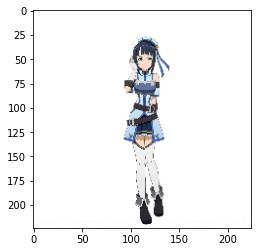

In [ ]:
for file_name in tqdm(os.listdir(config.src_path)):
  path = f'{config.src_path}/{file_name}'
  image = cv2.imread(path)
  image, show = normalize_single(image)
  pred = predict(image)
  print(config.classes[pred])
  plt.imshow(show.astype(np.uint8))
  break

## Filtering and Move

In [ ]:
import shutil

In [ ]:
class_name_label = {class_name: i for i , class_name in enumerate(config.classes)}
print(class_name_label)

{'good': 0, 'bad': 1}


In [ ]:
for file_name in tqdm(os.listdir(config.src_path)):
  print(file_name)

In [ ]:
for file_name in tqdm(os.listdir(config.src_path)):
  path = f'{config.src_path}/{file_name}'
  image = cv2.imread(path)

  image, show = normalize_single(image)# normalize cause model take normalized input only
  pred = predict(image) # pred and round up probability
  
  if pred == 0: #move files
    shutil.move(f"{config.src_path}/{file_name}", f"{config.save_path}/{config.classes[pred]}/{file_name}")
  elif pred == 1: #move files
    shutil.move(f"{config.src_path}/{file_name}", f"{config.save_path}/{config.classes[pred]}/{file_name}")
  

100%|██████████| 9409/9409 [36:12<00:00,  4.33it/s]


# Guassian Blur All

In [ ]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
class configure():
  def __init__(self):
    self.src_path = '/content/drive/MyDrive/Datasets/resized_ganime_fullbody_ultraclean'
    self.save_path = '/content/drive/MyDrive/Datasets/blur_ganime_fullbody_ultraclean'

config = configure()

In [ ]:
for file_name in tqdm(os.listdir(config.src_path)):
  path = f'{config.src_path}/{file_name}'
  save_path = f'{config.save_path}/{file_name}'
  image = cv2.imread(path)
  image = cv2.resize(image, (128,128))

  img = cv2.GaussianBlur(image, (3,3), 0) # blur img
  cv2.imwrite(save_path, img)

  # cv2.imwrite(f'{config.save_path}/{file_name}', img)
  

  0%|          | 0/4152 [00:00<?, ?it/s]


# Test

In [ ]:
import os

In [ ]:
path ='/content/drive/MyDrive/Datasets/nparray_resized_ganime_fullbody_cleaned_ds/'

In [ ]:
len(os.listdir(path))

7